In [ ]:
!pip install patool
import patoolib
patoolib.extract_archive('/content/Dataset (1).zip')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
patool: Extracting /content/Dataset (1).zip ...
patool: running /usr/bin/7z x -o./Unpack_m2b_hqul -- "/content/Dataset (1).zip"
patool: ... /content/Dataset (1).zip extracted to `Dataset (1)2' (local file exists).


'Dataset (1)2'

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/Dataset/Train'
valid_path = '/content/Dataset/Test'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [ ]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False


In [ ]:
# useful for getting number of output classes
folders = glob('Dataset/Train/*')


In [ ]:
folders

['Dataset/Train/Uninfected', 'Dataset/Train/Parasite']

In [ ]:
x = Flatten()(mobilnet.output)


In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 28, 28, 64)      

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [ ]:
training_set


In [ ]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-135-2d02736eff38>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
13/13 [==============================] - 7s 411ms/step - loss: 1.0426 - accuracy: 0.5553 - val_loss: 0.6789 - val_accuracy: 0.5597
Epoch 2/20
13/13 [==============================] - 5s 348ms/step - loss: 0.5624 - accuracy: 0.7139 - val_loss: 0.9390 - val_accuracy: 0.3507
Epoch 3/20
13/13 [==============================] - 5s 400ms/step - loss: 0.4607 - accuracy: 0.7596 - val_loss: 0.8703 - val_accuracy: 0.4030
Epoch 4/20
13/13 [==============================] - 4s 341ms/step - loss: 0.4214 - accuracy: 0.8005 - val_loss: 0.8851 - val_accuracy: 0.4403
Epoch 5/20
13/13 [==============================] - 5s 348ms/step - loss: 0.3696 - accuracy: 0.8317 - val_loss: 0.7668 - val_accuracy: 0.5224
Epoch 6/20
13/13 [==============================] - 5s 392ms/step - loss: 0.3377 - accuracy: 0.8438 - val_loss: 0.7485 - val_accuracy: 0.5970
Epoch 7/20
13/13 [==============================] - 4s 341ms/step - loss: 0.3016 - accuracy: 0.8726 - val_loss: 0.6797 - val_accuracy: 0.6418
Epoch 

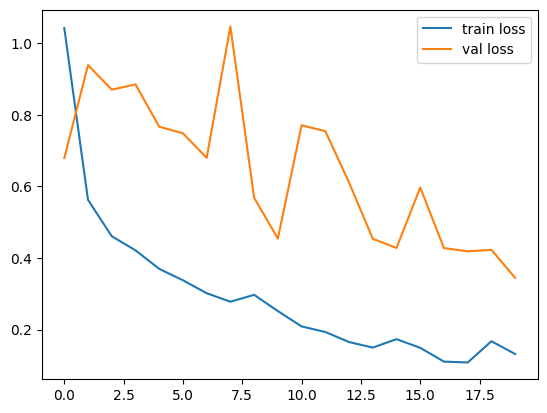

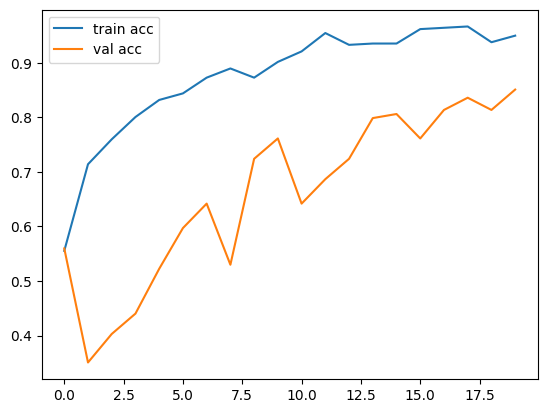

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [ ]:
y_pred = model.predict(test_set)

5/5 [==============================] - 0s 48ms/step


In [ ]:
y_pred

array([[9.99853611e-01, 1.46406586e-04],
       [9.97784317e-01, 2.21567485e-03],
       [6.88745916e-01, 3.11254054e-01],
       [9.99981403e-01, 1.85410991e-05],
       [7.02922046e-01, 2.97077924e-01],
       [7.34133571e-02, 9.26586688e-01],
       [9.83420908e-02, 9.01657939e-01],
       [9.99937415e-01, 6.25479879e-05],
       [9.65356708e-01, 3.46433260e-02],
       [9.52519834e-01, 4.74801101e-02],
       [9.85338807e-01, 1.46611389e-02],
       [1.00000000e+00, 4.66510954e-08],
       [6.23723678e-02, 9.37627673e-01],
       [9.97021735e-01, 2.97825621e-03],
       [1.10965200e-01, 8.89034808e-01],
       [8.40285063e-01, 1.59714863e-01],
       [9.92460787e-01, 7.53919454e-03],
       [4.03627753e-02, 9.59637165e-01],
       [2.13056266e-01, 7.86943734e-01],
       [9.95293200e-01, 4.70682420e-03],
       [7.67920390e-02, 9.23207939e-01],
       [1.75511800e-02, 9.82448816e-01],
       [9.95520949e-01, 4.47899196e-03],
       [9.90041673e-01, 9.95836314e-03],
       [2.796276

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_vgg19.h5')

In [ ]:
img=image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))


In [ ]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:

x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 0s 71ms/step


array([[1., 0.]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 20ms/step


In [ ]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
